In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [2]:
hub = pd.read_csv('C:\\Users\\jimmy\\Documents\\NSS_Analytics_Jumpstart\\data\\hubNashville_2018.csv')

In [3]:
hub = hub.rename(columns={'Request #':'request_id', 
                    'Status':'status', 
                    'Request Type':'request_type', 
                    'Subrequest Type':'subrequest_type',
                    'Additional Subrequest Type':'add_subrequest_type', 
                    'Date / Time Opened':'opened',
                    'Date / Time Closed':'closed', 
                    'Request Origin':'origin', 
                    'Zipcode':'zipcode', 
                    'Latitude':'lat',
                    'Longitude':'lng'})

In [14]:
# drop where closed column values are missing, count the number of records
hub = hub.dropna(subset='closed')
hub.shape

(80866, 11)

In [10]:
# convert opened and closed to datetime format
hub.opened = pd.to_datetime(hub.opened, format= "%Y-%m-%d %H:%M:%S")
hub.closed = pd.to_datetime(hub.closed, format= "%m/%d/%Y %I:%M:%S %p")

In [19]:
# create a column resolution_time to store how long the request was open
hub['resolution_time'] = hub.closed - hub.opened

In [27]:
# how many records were open for longer than a year, 288?
hub[hub.resolution_time > pd.Timedelta(days=365)].shape


(288, 12)

In [29]:
# what was the most common request type open for more than a year? 'streets, roads & sidewalks' 159 records
hub[hub.resolution_time > pd.Timedelta(days=365)].value_counts(subset='request_type')

request_type
Streets, Roads & Sidewalks    159
Property Violations            73
Other                          14
Public Safety                  14
Electric & Water General       10
Trash, Recycling & Litter       9
Education & Libraries           5
Planning & Zoning               2
Social Services & Housing       2
Name: count, dtype: int64

In [31]:
# save the records longer than a year to a new dataframe, slow_to_resolve
slow_to_resolve = hub[hub.resolution_time > pd.Timedelta(days=365)]

In [33]:
# Create a new resolution_time_hours column by dividing the resolution_time column by pd.Timedelta(hours = 1).

hub['resolution_time_hours'] = hub.resolution_time / pd.Timedelta(hours=1)

In [37]:
hub.resolution_time_hours.describe()

count    80866.000000
mean       352.098805
std       1038.193432
min          0.000000
25%         25.973958
50%         73.271944
75%        203.533333
max      22514.371111
Name: resolution_time_hours, dtype: float64

<Axes: ylabel='Frequency'>

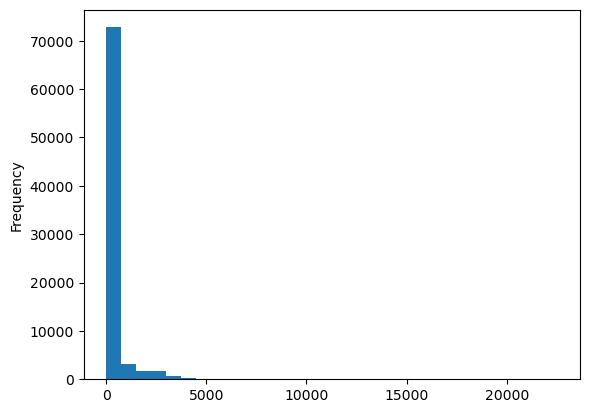

In [49]:
hub.resolution_time_hours.plot.hist(bins=30)

In [66]:
# create new dataframe, streets_median, to store median resolution time by zip code
streets_median = hub[hub.request_type == 'Streets, Roads & Sidewalks'].groupby('zipcode').resolution_time_hours.median().reset_index()

In [67]:
streets_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zipcode                37 non-null     object 
 1   resolution_time_hours  37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 724.0+ bytes
